# Dr. Simonson Chronic Mountain Sickness 


# RNASeq RSEM Quality Control and Counts Preparation


   > * Art Nasamran, CCBB (cnasamran@ucsd.edu)
   > * Based on upstream analysis by Guorong Xu, CCBB (g1xu@ucsd.edu)


## Table of Contents
* [Background](#Background)
* [Introduction](#Introduction)
* [Parameter Input](#Parameter-Input)
* [Library Import](#Library-Import)
* [Quality Control Visualization](#Quality-Control-Visualization)
* [MultiQC Report](#MultiQC-Report)
* [Counts Extraction](#Counts-Extraction)
* [Summary](#Summary)
* [Citations](#Citations)
* [Appendix: R Session Info](#Appendix:-R-Session-Info)


## Background

The count data analyzed in this notebook were produced by the primary analysis of Dr. Guorong Xu of CCBB, who received raw sequencing data and performed quality control (Fastqc v0.10.0),  alignment (STAR v2.5.3), and quantification (RSEMv1.3.0) of reads using GRCh38.p12.genome.fa and gencode.v29.annotation.gtf.


[Table of Contents](#Table-of-Contents)

## Introduction

This notebook takes in results of the RSEM ([1](#Citations)) RNASeq transcript quantification method, generates both custom and MultiQC-created ([2](#Citations)) quality control metrics, and extracts a per-sample-per-gene count file for use in future analyses.

[Table of Contents](#Table-of-Contents)

## Parameter Input

In [1]:
gDataDir = "../inputs/"
gOutputCountsFilename = "all_gene_counts.txt"

In [2]:
gOutputDir = "../outputs"
gMultiQcReportFileName = "multiqc_report.html"
gRsemCountsFp = file.path(gDataDir, "all_counts_results.txt")
gRsemGenesFp = file.path(gDataDir, "all_genes_results.txt")
gMultiQcReportFp = file.path(gDataDir, gMultiQcReportFileName)
gInternalMultiQcFp = file.path(gOutputDir, gMultiQcReportFileName)
gOutputCountsFp = file.path(gOutputDir, gOutputCountsFilename)

[Table of Contents](#Table-of-Contents)

## Library Import

Import the necessary R ([3](#Citations)) libraries:

In [3]:
# install.packages("splitstackshape")

In [4]:
library(IRdisplay)
library(splitstackshape)

In [5]:
# This line prevents SVG output, which interacts badly with export to HTML
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

[Table of Contents](#Table-of-Contents)


# Quality Control Visualization

Load the read counts and generate visualizations of the total number of reads, number of aligned reads, and fraction of reads uniquely aligned for each sample based on the alignment statistics produced by RSEM.  See https://github.com/deweylab/RSEM/blob/master/cnt_file_description.txt for a full description of these statistics.

In [6]:
stats <- read.csv(gRsemCountsFp, sep="\t", stringsAsFactors=F)

In [7]:
stats_names <- colnames(stats)
colnames(stats) <- stats_names[2:length(stats_names)]
l <- length(stats_names)-1
stats <- stats[,1:l]
stats_t <- t(stats)
stats_t_sub <- stats_t[,1:3]
qc <- cSplit(stats_t_sub, c("alignment_statistics", "alignment_certainty", "alignment_Hits"), sep=" ")
qc <- as.data.frame(qc)
rownames(qc) <- rownames(stats_t_sub)
colnames(qc) <- c("Num_unaligned", "Num_aligned", "Num_filtered", "Num_Total_Reads", "nUnique_reads", "nMulti_reads", "nUncertain_reads",
                "x", "nHits_num_total_alignments", "Read_type_SE1_PE2", "y", "z")
qc

,Num_unaligned,Num_aligned,Num_filtered,Num_Total_Reads,nUnique_reads,nMulti_reads,nUncertain_reads,x,nHits_num_total_alignments,Read_type_SE1_PE2,y,z
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<int>,<lgl>,<lgl>
EL24_S24_L004_R1_001.cnt_counts,448193,12976290,0,13424483,9725381,3250909,10573609,NA,42893202,3,NA,NA
EL1_S1_L004_R1_001.cnt_counts,568691,13696982,0,14265673,9864524,3832458,11500644,NA,44121647,3,NA,NA
EL35_S35_L004_R1_001.cnt_counts,745995,11771553,0,12517548,8134925,3636628,9442986,NA,37973617,3,NA,NA
EL58_S58_L004_R1_001.cnt_counts,403566,8477193,0,8880759,6448929,2028264,6616881,NA,27576914,3,NA,NA
EL12_S12_L004_R1_001.cnt_counts,417051,9989550,0,10406601,7478384,2511166,8066804,NA,32761997,3,NA,NA
EL55_S55_L004_R1_001.cnt_counts,653923,11054325,0,11708248,8283949,2770376,8736617,NA,35655978,3,NA,NA
EL64_S64_L004_R1_001.cnt_counts,367985,12634839,0,13002824,8822066,3812773,10756385,NA,42584492,3,NA,NA
EL65_S65_L004_R1_001.cnt_counts,458463,10636779,0,11095242,7857938,2778841,8887380,NA,35085477,3,NA,NA
EL62_S62_L004_R1_001.cnt_counts,375344,11698255,0,12073599,8893003,2805252,9516007,NA,38840840,3,NA,NA


In [8]:
# Calculate fraction of reads aligned, and fraction of reads uniquely aligned
qc$fraction_aligned <- qc$Num_aligned/qc$Num_Total_Reads
qc$fraction_unique_aligned <- qc$nUnique_reads/qc$Num_Total_Reads
qc

,Num_unaligned,Num_aligned,Num_filtered,Num_Total_Reads,nUnique_reads,nMulti_reads,nUncertain_reads,x,nHits_num_total_alignments,Read_type_SE1_PE2,y,z,fraction_aligned,fraction_unique_aligned
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<int>,<lgl>,<lgl>,<dbl>,<dbl>
EL24_S24_L004_R1_001.cnt_counts,448193,12976290,0,13424483,9725381,3250909,10573609,NA,42893202,3,NA,NA,0.9666138,0.7244511
EL1_S1_L004_R1_001.cnt_counts,568691,13696982,0,14265673,9864524,3832458,11500644,NA,44121647,3,NA,NA,0.9601357,0.6914868
EL35_S35_L004_R1_001.cnt_counts,745995,11771553,0,12517548,8134925,3636628,9442986,NA,37973617,3,NA,NA,0.9404041,0.6498817
EL58_S58_L004_R1_001.cnt_counts,403566,8477193,0,8880759,6448929,2028264,6616881,NA,27576914,3,NA,NA,0.9545573,0.7261687
EL12_S12_L004_R1_001.cnt_counts,417051,9989550,0,10406601,7478384,2511166,8066804,NA,32761997,3,NA,NA,0.9599244,0.7186193
EL55_S55_L004_R1_001.cnt_counts,653923,11054325,0,11708248,8283949,2770376,8736617,NA,35655978,3,NA,NA,0.9441485,0.7075310
EL64_S64_L004_R1_001.cnt_counts,367985,12634839,0,13002824,8822066,3812773,10756385,NA,42584492,3,NA,NA,0.9716996,0.6784731
EL65_S65_L004_R1_001.cnt_counts,458463,10636779,0,11095242,7857938,2778841,8887380,NA,35085477,3,NA,NA,0.9586793,0.7082259
EL62_S62_L004_R1_001.cnt_counts,375344,11698255,0,12073599,8893003,2805252,9516007,NA,38840840,3,NA,NA,0.9689120,0.7365660


In [9]:
# suppress scientific notation in plot labels
options(scipen=5) 

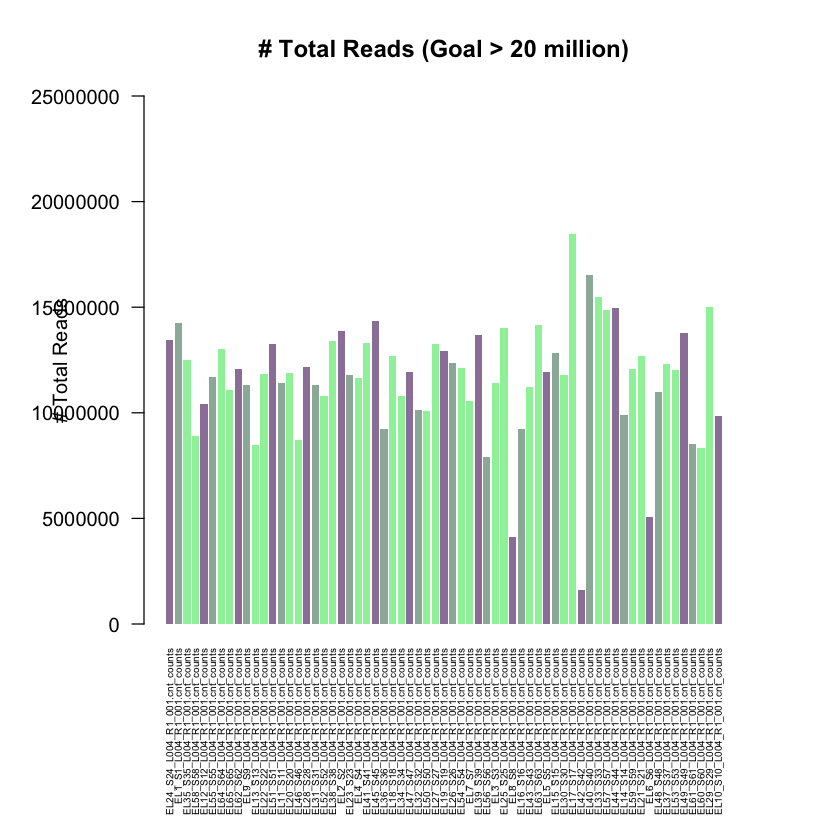

In [10]:
#Plot number of total reads for each sample
par(mar = c(7, 4, 2, 2) + 2)
# Basic Barplot
my_bar=barplot(qc$Num_Total_Reads,  border=F , names.arg=rownames(qc) , las=2 , 
               col=c(rgb(0.3,0.1,0.4,0.6) , rgb(0.3,0.5,0.4,0.6) , 
                rgb(0.3,0.9,0.4,0.6) ,  rgb(0.3,0.9,0.4,0.6)) ,
               ylim=c(0,25000000) , ylab = "# Total Reads", main="# Total Reads (Goal > 20 million)", cex.names = 0.5)
#labs <- rownames(qc)
#text(cex=.5,  labs, xpd=TRUE, srt=45)

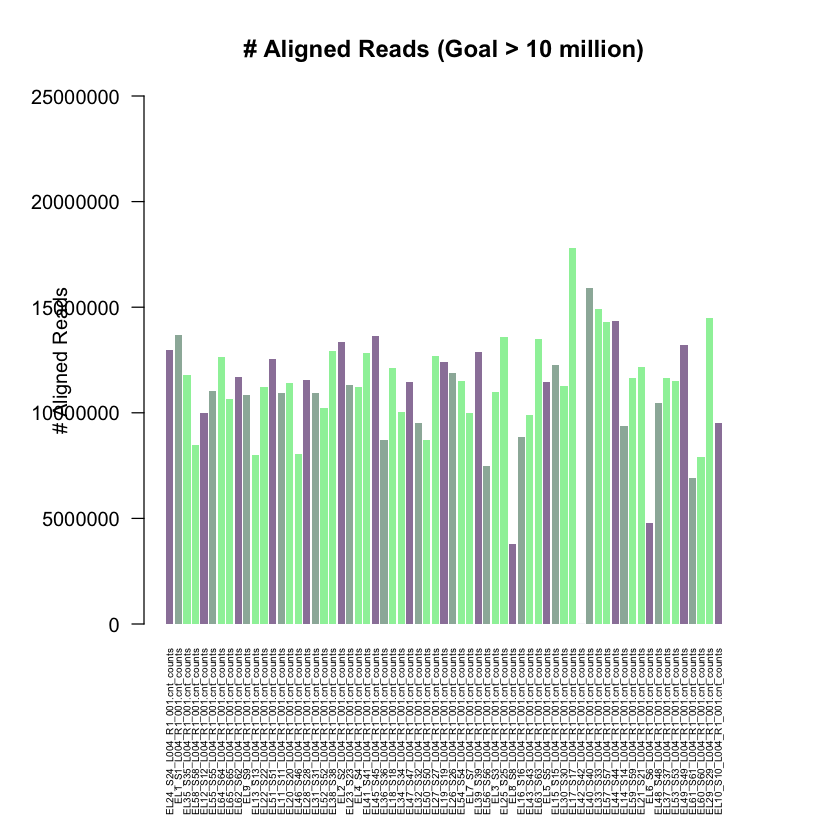

In [11]:
#Plot number of aligned reads for each sample
par(mar = c(7, 4, 2, 2) + 2)
# Basic Barplot
my_bar=barplot(qc$Num_aligned,  border=F , names.arg=rownames(qc) , las=2 , 
               col=c(rgb(0.3,0.1,0.4,0.6) , rgb(0.3,0.5,0.4,0.6) , 
                rgb(0.3,0.9,0.4,0.6) ,  rgb(0.3,0.9,0.4,0.6)) ,
               ylim=c(0,25000000) , ylab = "# Aligned Reads", main="# Aligned Reads (Goal > 10 million)",
              cex.names = 0.5)
#labs <- rownames(qc)
#text(cex=.5,  labs, xpd=TRUE, srt=45)

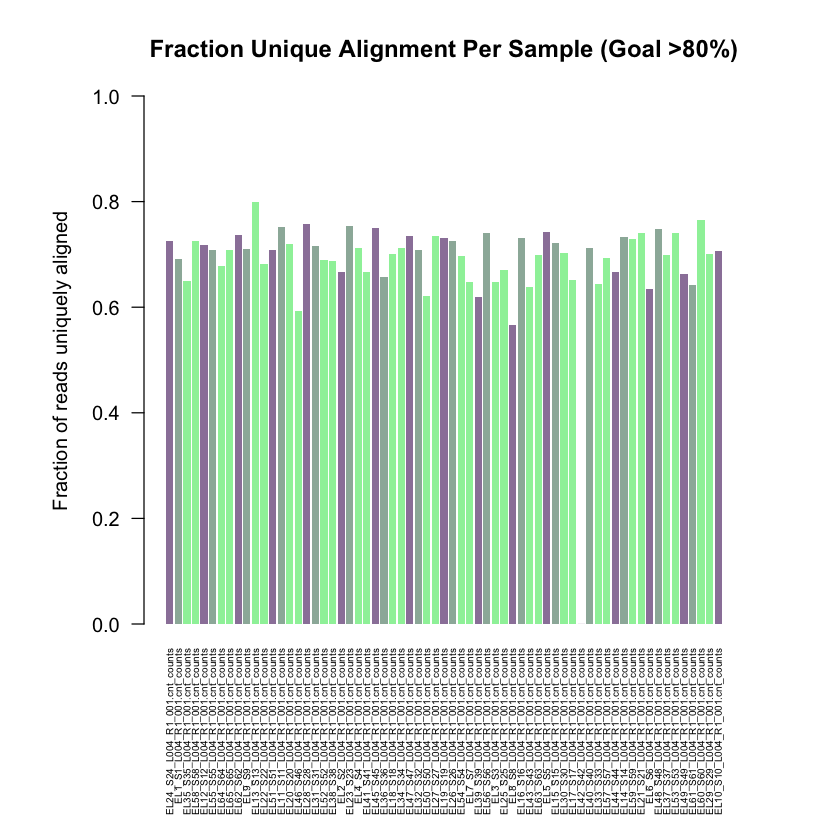

In [12]:
#Plot fraction of reads uniquely aligned for each sample
par(mar = c(7, 4, 2, 2) + 2)
# Basic Barplot
my_bar=barplot(qc$fraction_unique_aligned,  border=F , names.arg=rownames(qc) , las=2 , 
               col=c(rgb(0.3,0.1,0.4,0.6) , rgb(0.3,0.5,0.4,0.6) , 
                rgb(0.3,0.9,0.4,0.6) ,  rgb(0.3,0.9,0.4,0.6)) ,
               ylim=c(0,1) , ylab = "Fraction of reads uniquely aligned", main="Fraction Unique Alignment Per Sample (Goal >80%)",
              cex.names = 0.5)
#labs <- rownames(qc)
#text(cex=.5,  labs, xpd=TRUE, srt=45)

> All samples are below the recommended 20M total reads and 80% unique alignment thresholds. However, many samples exceed the 10M aligned reads threshold.


[Table of Contents](#Table-of-Contents)


# MultiQC Report

Move the MultiQC report created in the primary analysis to the output directory and display it here for examination:

In [13]:
system(paste("cp", gMultiQcReportFp, gInternalMultiQcFp))

In [14]:
IRdisplay::display_html(paste0('<iframe src="', gInternalMultiQcFp, '" width=1000, height=1000></iframe> '))

> Failed samples: EL42_S42

> Samples with low alignment percentage and high duplication percentage: EL10_S10, EL17_S17, EL25_S25, EL2_S2, EL33_S33, EL46_S46, EL49_S49, EL64_S64, EL6_S6, EL7_S7, EL8_S8


[Table of Contents](#Table-of-Contents)


# Counts Extraction

Extract raw counts column from RSEM output per sample. 

In [15]:
loadAndCleanStarRsemAllGeneResults = function(rsemGenesFp, sep="\t"){
    rsemGenesDf = read.table(rsemGenesFp, header = TRUE, sep=sep, stringsAsFactors=FALSE)
    geneCountsDf <- rsemGenesDf[,sapply(colnames(rsemGenesDf), function(x) any(grepl(".results_expected_count",x)))]
    colnames(geneCountsDf) <- gsub(".genes.results_expected_count","", colnames(geneCountsDf))
    row.names(geneCountsDf) <- rsemGenesDf$gene_id   
    return(geneCountsDf)
}

In [16]:
gUnorderedGeneCountsDf = loadAndCleanStarRsemAllGeneResults(gRsemGenesFp)

In [17]:
dim(gUnorderedGeneCountsDf)
head(gUnorderedGeneCountsDf)

[1] 58721    65

,EL20_S20_L004_R1_001,EL62_S62_L004_R1_001,EL60_S60_L004_R1_001,EL59_S59_L004_R1_001,EL61_S61_L004_R1_001,EL29_S29_L004_R1_001,EL49_S49_L004_R1_001,EL32_S32_L004_R1_001,EL51_S51_L004_R1_001,EL22_S22_L004_R1_001,⋯,EL6_S6_L004_R1_001,EL24_S24_L004_R1_001,EL10_S10_L004_R1_001,EL12_S12_L004_R1_001,EL34_S34_L004_R1_001,EL38_S38_L004_R1_001,EL58_S58_L004_R1_001,EL50_S50_L004_R1_001,EL44_S44_L004_R1_001,EL63_S63_L004_R1_001
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.14,1.00,2.00,2.00,4.00,4.00,0.00,3.00,2.00,2.00,4.00,⋯,1.00,3.00,2.00,0.00,1.00,4.00,3.00,0.00,4.00,4.00
ENSG00000000005.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000000419.12,118.00,127.00,107.00,159.00,79.00,83.00,100.00,151.00,189.00,79.00,⋯,47.00,118.00,92.00,64.00,183.00,189.00,86.00,137.00,184.00,118.00
ENSG00000000457.13,240.62,276.31,254.35,225.02,234.61,200.96,165.91,269.95,323.61,157.46,⋯,106.28,294.79,227.07,203.26,263.25,272.84,186.32,216.41,292.29,253.39
ENSG00000000460.16,88.38,68.69,50.65,75.98,65.39,55.04,54.09,53.05,87.39,42.54,⋯,31.72,57.21,56.93,56.74,72.75,66.16,71.68,46.59,86.71,57.61
ENSG00000000938.12,2142.00,2545.00,2243.00,2249.00,1732.00,2083.00,2114.00,2422.00,3041.00,1814.00,⋯,754.00,2276.00,2138.00,2273.00,2817.00,2381.00,1847.00,1936.00,2874.00,2931.00


In [18]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [19]:
head(gUnorderedGeneCountsDf)
gene_names <- rownames(gUnorderedGeneCountsDf)

PAR_Y_genes <- gene_names[grep("_PAR_Y", gene_names)]
raw_PAR_Y_gene <- gsub("_PAR_Y","", PAR_Y_genes)

par_gene_df <- subset(gUnorderedGeneCountsDf, gene_names %in% PAR_Y_genes)
rownames(par_gene_df) <- raw_PAR_Y_gene

a <- bind_rows(gUnorderedGeneCountsDf %>% add_rownames(), par_gene_df %>% add_rownames()) %>% group_by(rowname) %>% summarise_all(sum)
dim(a)

gUnorderedGeneCounts_no_par_gene_df <- subset(a, !(gene_names %in% PAR_Y_genes))
dim(gUnorderedGeneCounts_no_par_gene_df)

,EL20_S20_L004_R1_001,EL62_S62_L004_R1_001,EL60_S60_L004_R1_001,EL59_S59_L004_R1_001,EL61_S61_L004_R1_001,EL29_S29_L004_R1_001,EL49_S49_L004_R1_001,EL32_S32_L004_R1_001,EL51_S51_L004_R1_001,EL22_S22_L004_R1_001,⋯,EL6_S6_L004_R1_001,EL24_S24_L004_R1_001,EL10_S10_L004_R1_001,EL12_S12_L004_R1_001,EL34_S34_L004_R1_001,EL38_S38_L004_R1_001,EL58_S58_L004_R1_001,EL50_S50_L004_R1_001,EL44_S44_L004_R1_001,EL63_S63_L004_R1_001
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.14,1.00,2.00,2.00,4.00,4.00,0.00,3.00,2.00,2.00,4.00,⋯,1.00,3.00,2.00,0.00,1.00,4.00,3.00,0.00,4.00,4.00
ENSG00000000005.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000000419.12,118.00,127.00,107.00,159.00,79.00,83.00,100.00,151.00,189.00,79.00,⋯,47.00,118.00,92.00,64.00,183.00,189.00,86.00,137.00,184.00,118.00
ENSG00000000457.13,240.62,276.31,254.35,225.02,234.61,200.96,165.91,269.95,323.61,157.46,⋯,106.28,294.79,227.07,203.26,263.25,272.84,186.32,216.41,292.29,253.39
ENSG00000000460.16,88.38,68.69,50.65,75.98,65.39,55.04,54.09,53.05,87.39,42.54,⋯,31.72,57.21,56.93,56.74,72.75,66.16,71.68,46.59,86.71,57.61
ENSG00000000938.12,2142.00,2545.00,2243.00,2249.00,1732.00,2083.00,2114.00,2422.00,3041.00,1814.00,⋯,754.00,2276.00,2138.00,2273.00,2817.00,2381.00,1847.00,1936.00,2874.00,2931.00


Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”

[1] 58721    66

[1] 58676    66

Write out the resulting gene counts to a tab-delimited text file:

In [22]:
write.table(gUnorderedGeneCounts_no_par_gene_df, gOutputCountsFp, sep = "\t", row.names = FALSE)

[Table of Contents](#Table-of-Contents)

## Summary


> **QC metrics**
* All samples are below the recommended 20M total reads and 80% unique alignment thresholds. However, many samples exceed the 10M aligned reads threshold.

> **Comments about MultiQC/FastQC stats**
* Failed samples: EL42_S42

* Samples with low alignment percentage and high duplication percentage: EL10_S10, EL17_S17, EL25_S25, EL2_S2, EL33_S33, EL46_S46, EL49_S49, EL64_S64, EL6_S6, EL7_S7, EL8_S8


[Table of Contents](#Table-of-Contents)

## Citations

1. Li B, Dewey CN. RSEM: accurate transcript quantification from RNA-Seq data with or without a reference genome. BMC Bioinformatics. 2011 Aug 4;12:323.
2. Ewels P, Magnusson M, Lundin S, Käller M. MultiQC: summarize analysis results  for multiple tools and samples in a single report. Bioinformatics. 2016 Oct 1;32(19):3047-8.
3. R Core Team (2016). R: A language and environment for statistical computing. R Foundation for Statistical Computing, Vienna, Austria. URL https://www.R-project.org/.

[Table of Contents](#Table-of-Contents)

## Appendix: R Session Info

In [21]:
sessionInfo()

R version 3.5.2 (2018-12-20)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Mojave 10.14.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dplyr_0.8.3           splitstackshape_1.4.8 IRdisplay_0.7.0      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3        magrittr_1.5      tidyselect_0.2.5  uuid_0.1-2       
 [5] R6_2.4.1          rlang_0.4.4       tools_3.5.2       data.table_1.12.8
 [9] htmltools_0.4.0   digest_0.6.23     assertthat_0.2.1  tibble_2.1.3     
[13] crayon_1.3.4      purrr_0.3.3       repr_1.0.1        base64enc_0.1-3  
[17] vctrs_0.2.2       IRkernel_1.0.2    glue_1.3.1        evaluate_0.14    

[Table of Contents](#Table-of-Contents)

Copyright (c) 2018 UC San Diego Center for Computational Biology & Bioinformatics under the MIT License

Notebook template by Amanda Birmingham